Standard Banner Statistics:
Average Wins: 7.0646
Standard Deviation: 0.9360698905530506
Z-score for Average Wins: 0.0

Fate Banner Statistics:
Average Wins: 7.5882
Standard Deviation: 1.9018466710016346
Z-score for Average Wins: -1.8866925786978521



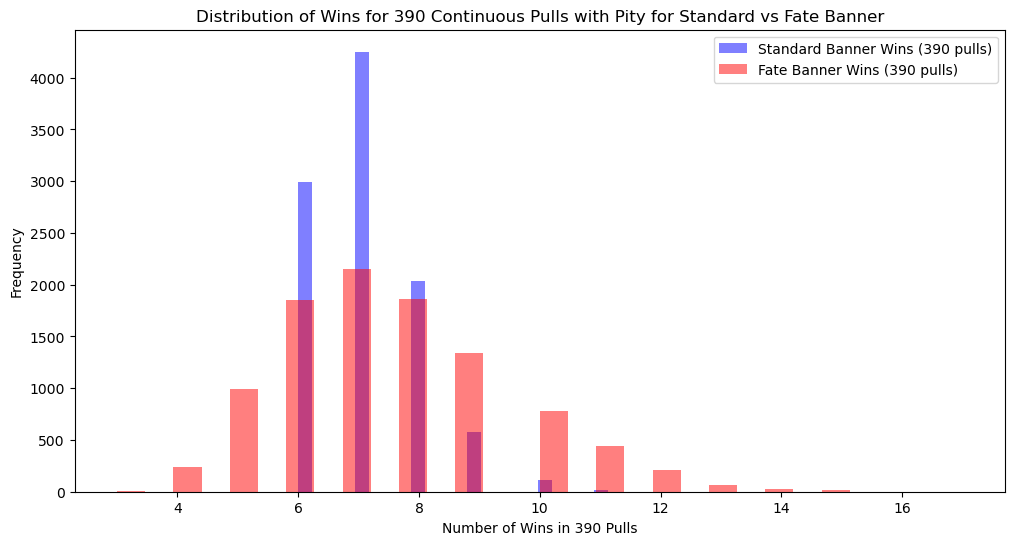

In [10]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Define simulation parameters
one_year_pulls = 390  # Total pulls for a 1-year period
simulations = 10000  # Number of 1-year simulations

# Storage for 1-year win counts
one_year_standard_wins = []
one_year_fate_wins = []

def run_gacha_with_pity(pity_limit, win_chance, max_pulls):
    """Simulates pulling with pity, counting independent wins over max_pulls."""
    wins = 0
    pulls = 0

    while pulls < max_pulls:
        pity_counter = 0
        for _ in range(pity_limit):
            pity_counter += 1
            pulls += 1
            # Check if the current pull results in a win or reaches pity limit
            if random.randint(1, win_chance) == 1 or pity_counter == pity_limit:
                wins += 1
                break
            # Stop if we reach max pulls
            if pulls >= max_pulls:
                break

    return wins

# Run 390-pull simulations for both lotteries with pity guarantees
for _ in range(simulations):
    # Standard Lottery: 0.5% win chance (1/200), pity at 60 pulls
    standard_wins = run_gacha_with_pity(60, 200, one_year_pulls)
    one_year_standard_wins.append(standard_wins)
    
    # Fate Lottery: 1.5% win chance (1/67), pity between 80 and 100 pulls
    fate_pity = random.randint(80, 100)
    fate_wins = run_gacha_with_pity(fate_pity, 67, one_year_pulls)
    one_year_fate_wins.append(fate_wins)

# Calculate statistics functions
def calculate_average(data):
    return sum(data) / len(data)

def calculate_standard_deviation(data, mean):
    return (sum((x - mean) ** 2 for x in data) / len(data)) ** 0.5

def calculate_z_score(value, mean, std_dev):
    return (value - mean) / std_dev

# Calculate averages, standard deviations, and a sample z-score for each banner
standard_avg = calculate_average(one_year_standard_wins)
fate_avg = calculate_average(one_year_fate_wins)

standard_std_dev = calculate_standard_deviation(one_year_standard_wins, standard_avg)
fate_std_dev = calculate_standard_deviation(one_year_fate_wins, fate_avg)

# Example z-scores (for the average win count as a reference)
standard_z_score = calculate_z_score(standard_avg, standard_avg, standard_std_dev)
fate_z_score = calculate_z_score(4, fate_avg, fate_std_dev)

# Print out the statistics
print("Standard Banner Statistics:")
print(f"Average Wins: {standard_avg}")
print(f"Standard Deviation: {standard_std_dev}")
print(f"Z-score for Average Wins: {standard_z_score}\n")

print("Fate Banner Statistics:")
print(f"Average Wins: {fate_avg}")
print(f"Standard Deviation: {fate_std_dev}")
print(f"Z-score for Average Wins: {fate_z_score}\n")

# Plot the results
plt.figure(figsize=(12, 6))

# Plot Standard wins over 390 pulls
plt.hist(one_year_standard_wins, bins=30, alpha=0.5, color='blue', label='Standard Banner Wins (390 pulls)')
# Plot Fate wins over 390 pulls
plt.hist(one_year_fate_wins, bins=30, alpha=0.5, color='red', label='Fate Banner Wins (390 pulls)')

plt.title("Distribution of Wins for 390 Continuous Pulls with Pity for Standard vs Fate Banner")
plt.xlabel("Number of Wins in 390 Pulls")
plt.ylabel("Frequency")
plt.legend()
plt.show()